In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing important libraries

In [349]:
import numpy as np
import pandas as pd
import seaborn as sns 

# Reading the dataset


In [350]:
loan_data = pd.read_csv("/content/drive/MyDrive/loan.csv") 
loan_data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


# Data Analysis

In [351]:
loan_data.shape

(614, 13)

There are **614** rows & **13 columns**. This means there are 614 datapoints in the dataset & 13 features.

In [352]:
loan_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Out of these features, the feature **'survived' is the target feature**. 

In [353]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [354]:
loan_data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [355]:

#missing data
total = loan_data.isnull().sum().sort_values(ascending=False)
percent = (loan_data.isnull().sum()/loan_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total_missing', 'Percent'])
missing_data

,Total_missing,Percent
Credit_History,50,0.081433
Self_Employed,32,0.052117
LoanAmount,22,0.035831
Dependents,15,0.024430
Loan_Amount_Term,14,0.022801
Gender,13,0.021173
Married,3,0.004886
Loan_Status,0,0.000000
Property_Area,0,0.000000
CoapplicantIncome,0,0.000000


*  There are **8 object fields** which needs to be encoded. 

*  'Gender', 'Married' & 'Dependents' 'Self_Employed' 'LoanAmount' 'Loan_Amount_Term' 'Credit_History' has some **missing values**


So I need to know how many Nan values are there in each columns.

# Data Visualization

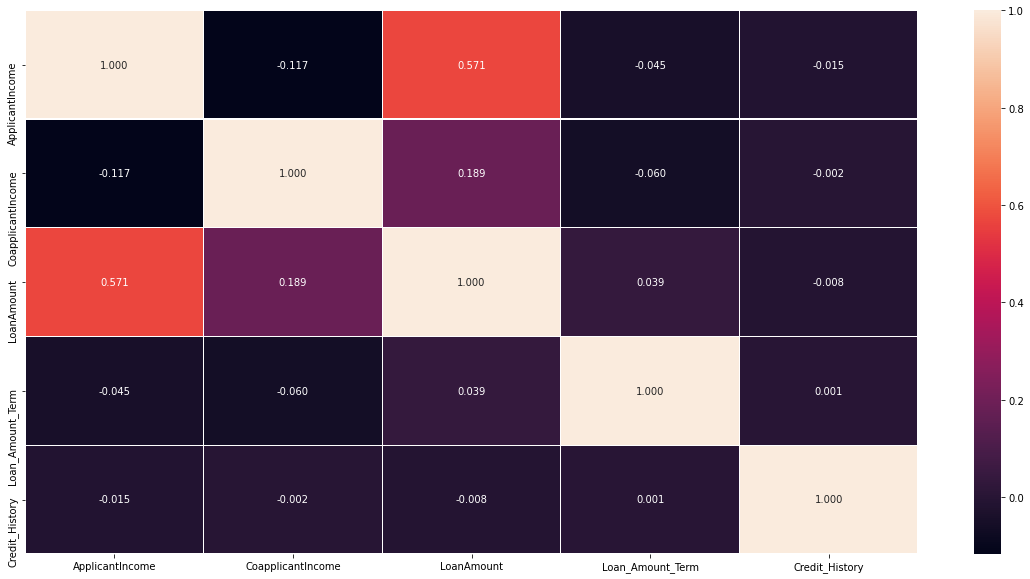

In [356]:
import matplotlib.pyplot as plt


plt.figure(figsize=(20,10))
sns.heatmap(loan_data.corr(), annot=True, linewidths=0.3, fmt= '.3f')

In [357]:
loan_data.corr()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


# data preprocessing

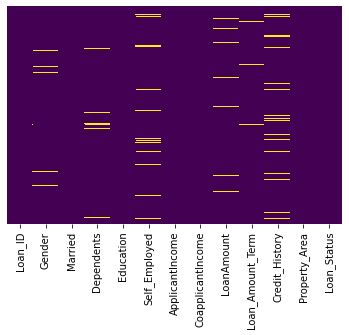

In [358]:
sns.heatmap(loan_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


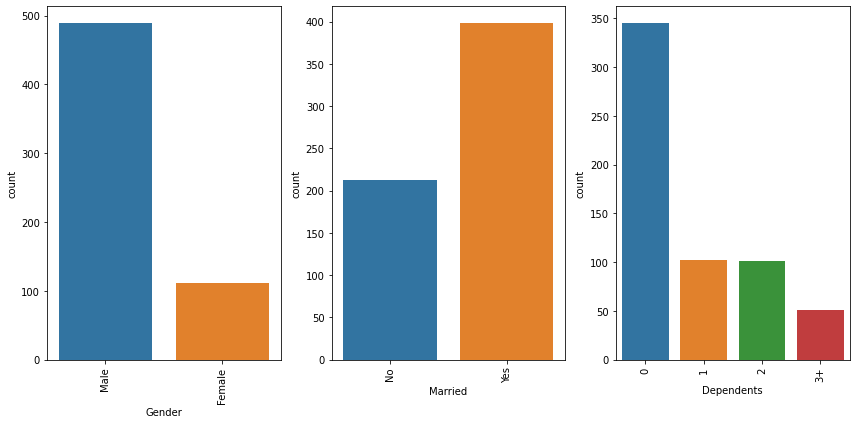

In [359]:
fig, axes = plt.subplots(ncols=3,figsize=(12,6))

g = sns.countplot(loan_data["Gender"], ax=axes[0])
plt.setp(g.get_xticklabels(), rotation=90)
g = sns.countplot(loan_data["Married"], ax=axes[1])
plt.setp(g.get_xticklabels(), rotation=90)
g = sns.countplot(loan_data["Dependents"], ax=axes[2])
plt.setp(g.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


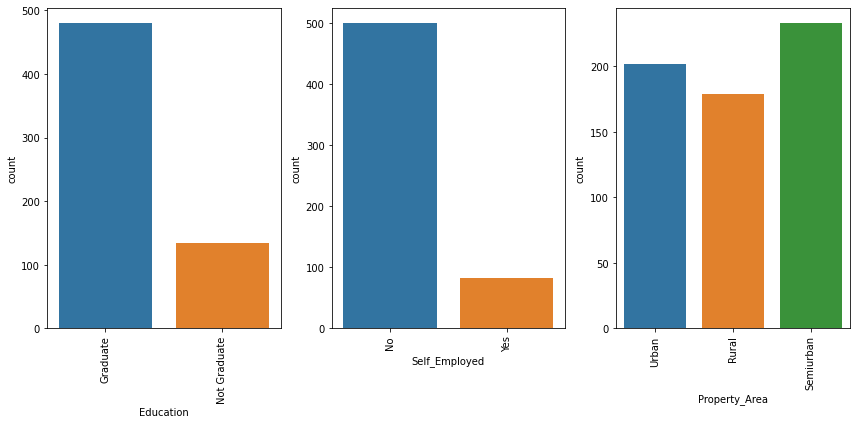

In [360]:
fig, axes = plt.subplots(ncols=3,figsize=(12,6))

g = sns.countplot(loan_data["Education"], ax=axes[0])
plt.setp(g.get_xticklabels(), rotation=90)
g = sns.countplot(loan_data["Self_Employed"], ax=axes[1])
plt.setp(g.get_xticklabels(), rotation=90)
g = sns.countplot(loan_data["Property_Area"], ax=axes[2])
plt.setp(g.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

In [361]:
print(loan_data.describe())

       ApplicantIncome  CoapplicantIncome  ...  Loan_Amount_Term  Credit_History
count       614.000000         614.000000  ...         600.00000      564.000000
mean       5403.459283        1621.245798  ...         342.00000        0.842199
std        6109.041673        2926.248369  ...          65.12041        0.364878
min         150.000000           0.000000  ...          12.00000        0.000000
25%        2877.500000           0.000000  ...         360.00000        1.000000
50%        3812.500000        1188.500000  ...         360.00000        1.000000
75%        5795.000000        2297.250000  ...         360.00000        1.000000
max       81000.000000       41667.000000  ...         480.00000        1.000000

[8 rows x 5 columns]


### encoding the target feature 

In [362]:
loan_data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


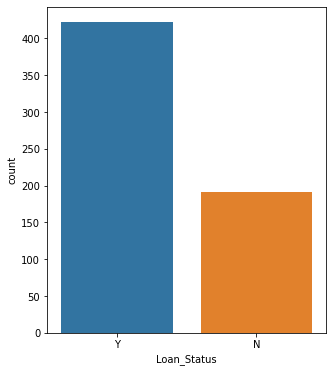

In [363]:
plt.figure(figsize=(5,6))
sns.countplot('Loan_Status',data=loan_data)
plt.show()

In [364]:
# create a function for level encoding
def level_encoding(feature):
    feature_sort=loan_data[feature].value_counts().index
    features={}
    j=0
    for i in feature_sort:
        features[i]=j
        j+=1
    loan_data[feature]=loan_data[feature].map(features)

In [365]:
level_encoding('Loan_Status')

Y-----0   &  
N-----1

### encoding all dependent features

In [366]:
loan_data['Loan_ID'].value_counts()

LP002813    1
LP002139    1
LP001963    1
LP002300    1
LP002643    1
           ..
LP002544    1
LP002149    1
LP001811    1
LP001922    1
LP001750    1
Name: Loan_ID, Length: 614, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


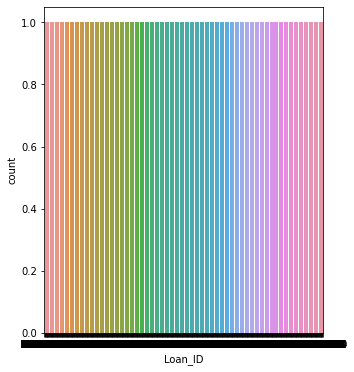

In [367]:
plt.figure(figsize=(5,6))
sns.countplot('Loan_ID',data=loan_data)
plt.show()

**Loan_id** is not required . drop it

In [368]:
loan_data = loan_data.drop("Loan_ID", axis=1)
loan_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,1
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,0
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,0


# Gender

In [369]:
loan_data['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


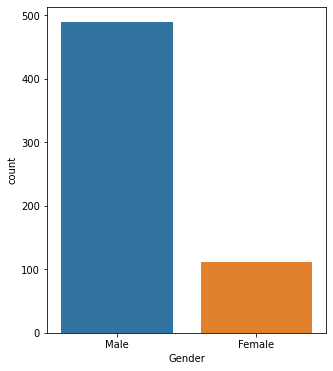

In [370]:
plt.figure(figsize=(5,6))
sns.countplot('Gender',data=loan_data)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


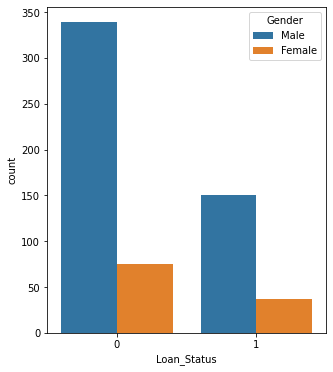

In [371]:
plt.figure(figsize=(5,6))
sns.countplot('Loan_Status',hue="Gender",data=loan_data)
plt.show()

No of **Male** is high ,so missing data is filling with "Male"

In [372]:
loan_data['Gender']=loan_data['Gender'].fillna("Male")

In [373]:
level_encoding('Gender')

Male--------0
Female------1

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


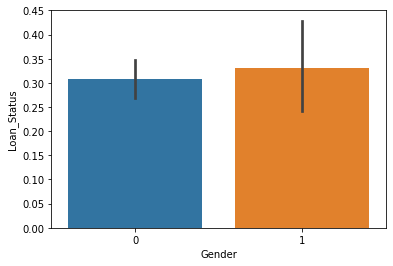

In [374]:
sns.barplot("Gender", "Loan_Status", data=loan_data)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


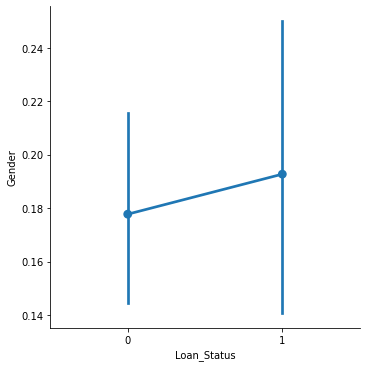

In [375]:
sns.factorplot("Loan_Status","Gender",  data=loan_data)

# Married

In [376]:
loan_data['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


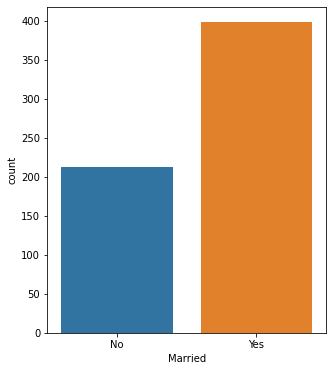

In [377]:
plt.figure(figsize=(5,6))
sns.countplot('Married',data=loan_data)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


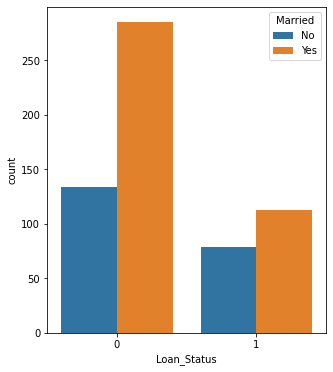

In [378]:
plt.figure(figsize=(5,6))
sns.countplot('Loan_Status',hue='Married',data=loan_data)
plt.show()

In [379]:
loan_data['Married']=loan_data['Married'].fillna("Yes")

In [380]:
level_encoding('Married')

Yes--------0
No------1

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


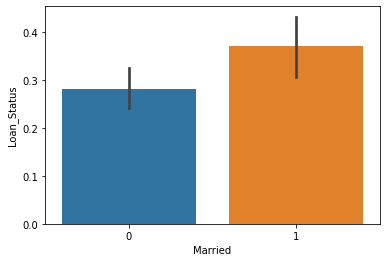

In [381]:
sns.barplot("Married", "Loan_Status", data=loan_data)

## Dependents

In [382]:
loan_data['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


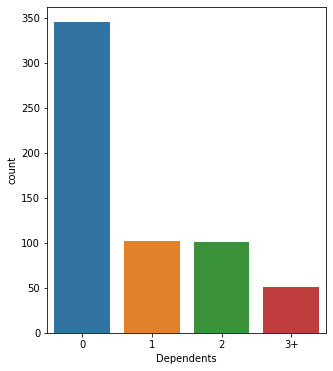

In [383]:
plt.figure(figsize=(5,6))
sns.countplot('Dependents',data=loan_data)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


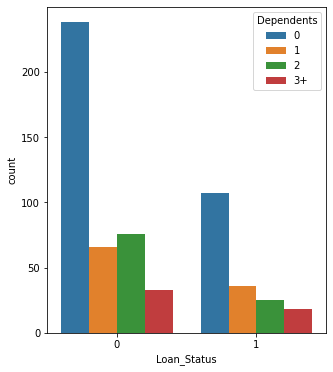

In [384]:
plt.figure(figsize=(5,6))
sns.countplot('Loan_Status',hue='Dependents',data=loan_data)
plt.show()

In [385]:
loan_data['Dependents']=loan_data['Dependents'].fillna(0)

In [386]:
level_encoding('Dependents')

0--------0
1------1
2--------2
3+------3

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


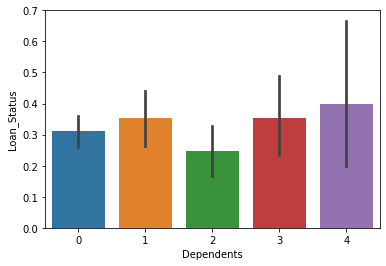

In [387]:
sns.barplot("Dependents", "Loan_Status", data=loan_data)

## Education

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


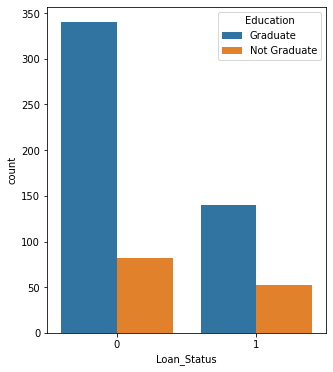

In [388]:
plt.figure(figsize=(5,6))
sns.countplot('Loan_Status',hue='Education',data=loan_data)
plt.show()

In [389]:
level_encoding('Education')

## Self_Employ

In [390]:
loan_data['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


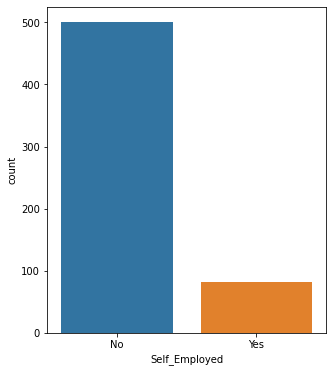

In [391]:
plt.figure(figsize=(5,6))
sns.countplot('Self_Employed',data=loan_data)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


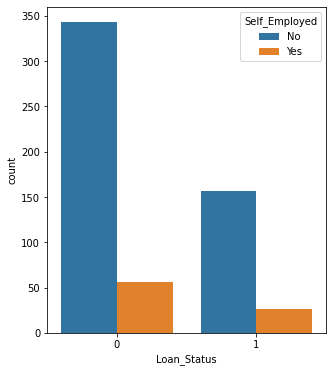

In [392]:
plt.figure(figsize=(5,6))
sns.countplot('Loan_Status',hue='Self_Employed',data=loan_data)
plt.show()

In [393]:
loan_data['Self_Employed'] = loan_data['Self_Employed'].fillna( 
                               loan_data['Self_Employed'].dropna().mode().values[0] )

In [394]:
level_encoding('Self_Employed')

No--------0
Yes------1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


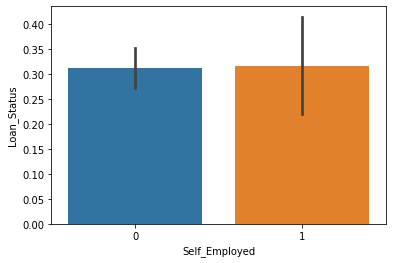

In [395]:
sns.barplot("Self_Employed", "Loan_Status", data=loan_data)

# Applicant Income

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


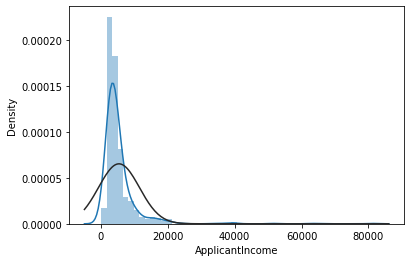

<Figure size 432x288 with 0 Axes>

In [396]:
from scipy.stats import norm
sns.distplot(loan_data['ApplicantIncome'], fit=norm);
fig = plt.figure()

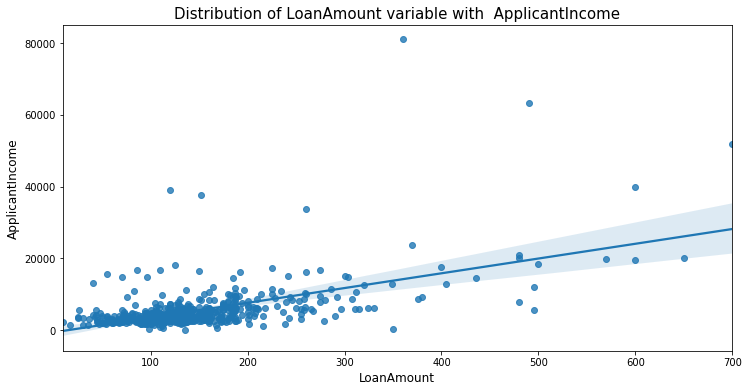

In [397]:
plt.figure(figsize=(12,6))
sns.regplot(x="LoanAmount", y='ApplicantIncome', data=loan_data)
plt.xlabel("LoanAmount", fontsize=12)
plt.ylabel('ApplicantIncome', fontsize=12)
plt.title("Distribution of LoanAmount variable with  ApplicantIncome", fontsize=15)
plt.show()

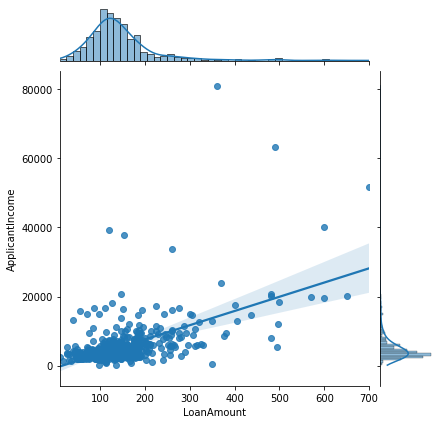

In [437]:
sns.jointplot(x='LoanAmount',y='ApplicantIncome',data=loan_data, kind="reg")

# Coapplicant income

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


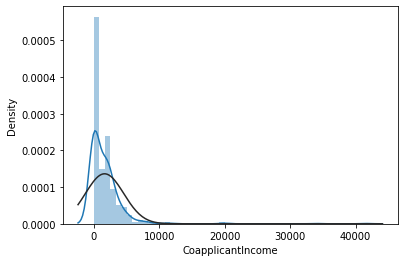

<Figure size 432x288 with 0 Axes>

In [398]:
sns.distplot(loan_data['CoapplicantIncome'], fit=norm);
fig = plt.figure()

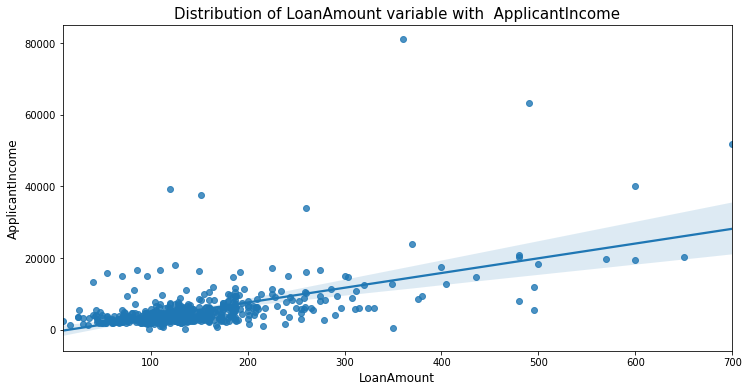

In [399]:
plt.figure(figsize=(12,6))
sns.regplot(x="LoanAmount", y='ApplicantIncome', data=loan_data)
plt.xlabel("LoanAmount", fontsize=12)
plt.ylabel('ApplicantIncome', fontsize=12)
plt.title("Distribution of LoanAmount variable with  ApplicantIncome", fontsize=15)
plt.show()

**Applicant Income** & **Coapplicant income** has relation with **Loan ammount**

## Loan Amount

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


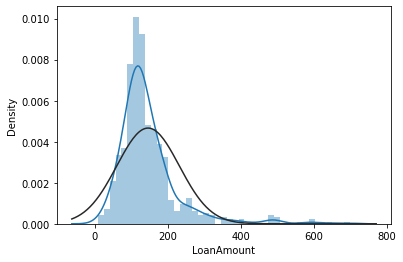

<Figure size 432x288 with 0 Axes>

In [400]:
sns.distplot(loan_data['LoanAmount'], fit=norm);
fig = plt.figure()

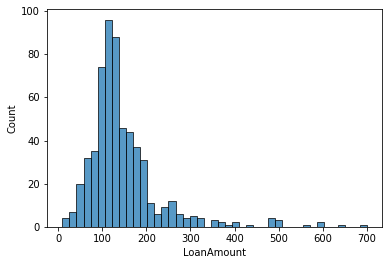

In [401]:
#LoanAmount = sns.load_dataset(loan_data["LoanAmount"])
#sns.histplot(data=loan_data, x="LoanAmount",kde=True)

sns.histplot(loan_data["LoanAmount"])

In [402]:
loan_data['LoanAmount'].value_counts()

120.0    20
110.0    17
100.0    15
187.0    12
160.0    12
         ..
570.0     1
300.0     1
376.0     1
117.0     1
311.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [403]:
loan_data['LoanAmount']=loan_data['LoanAmount'].fillna( 
                               loan_data['LoanAmount'].dropna().mean() )


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


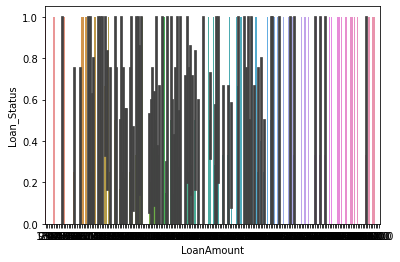

In [404]:
sns.barplot('LoanAmount', "Loan_Status", data=loan_data)

Text(0.5, 1.0, 'Distribution of LoanAmount variable with  Loan_Status')

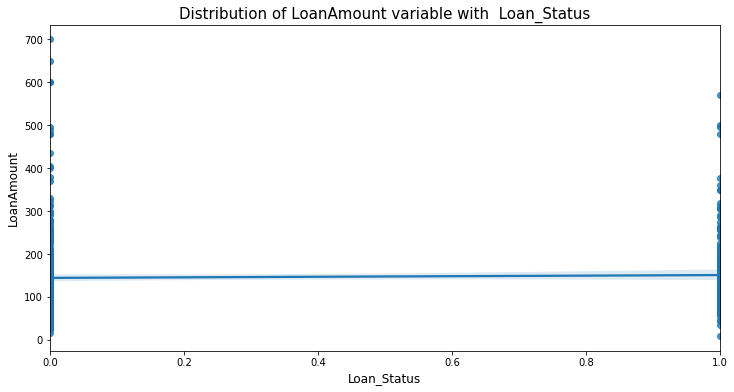

In [405]:
plt.figure(figsize=(12,6))
sns.regplot(x="Loan_Status", y='LoanAmount', data=loan_data)
plt.xlabel("Loan_Status", fontsize=12)
plt.ylabel('LoanAmount', fontsize=12)
plt.title("Distribution of LoanAmount variable with  Loan_Status", fontsize=15)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


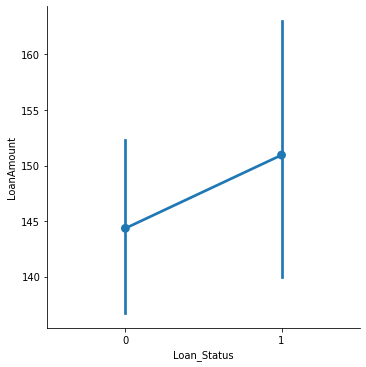

In [406]:
sns.factorplot("Loan_Status","LoanAmount",  data=loan_data)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

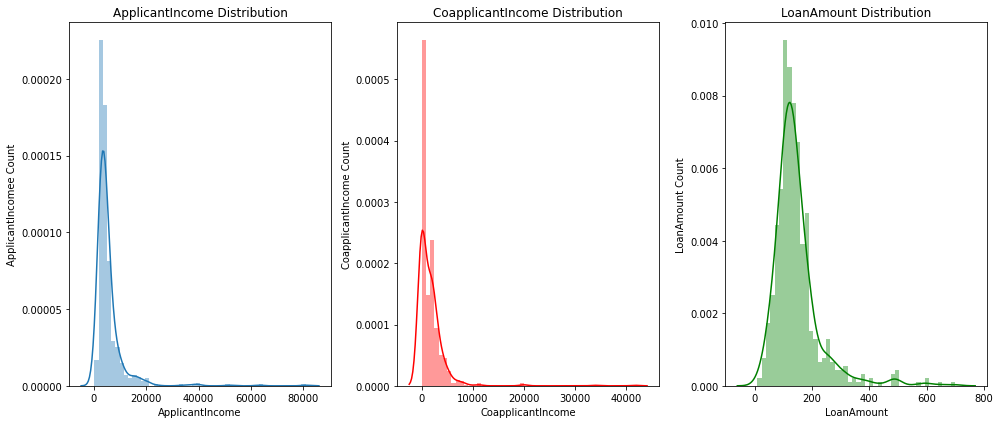

In [407]:
flg, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (14,6))

sns.distplot(loan_data['ApplicantIncome'], ax = axes[0]).set_title('ApplicantIncome Distribution')
axes[0].set_ylabel('ApplicantIncomee Count')

sns.distplot(loan_data['CoapplicantIncome'], color = "r", ax = axes[1]).set_title('CoapplicantIncome Distribution')
axes[1].set_ylabel('CoapplicantIncome Count')

sns.distplot(loan_data['LoanAmount'],color = "g", ax = axes[2]).set_title('LoanAmount Distribution')
axes[2].set_ylabel('LoanAmount Count')

plt.tight_layout()
plt.show()

## Loan_Amount_Term

In [408]:
loan_data['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


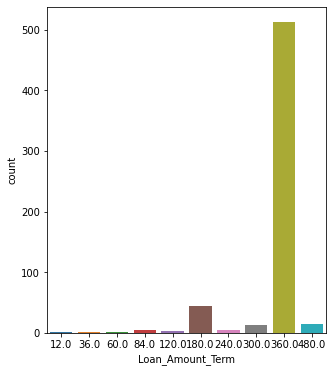

In [409]:
plt.figure(figsize=(5,6))
sns.countplot('Loan_Amount_Term',data=loan_data)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


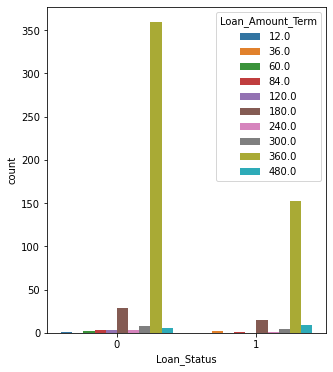

In [410]:
plt.figure(figsize=(5,6))
sns.countplot('Loan_Status',hue='Loan_Amount_Term',data=loan_data)
plt.show()

In [411]:

loan_data['Loan_Amount_Term'] = loan_data['Loan_Amount_Term'].fillna( 
                               loan_data['Loan_Amount_Term'].dropna().mode().values[0] )


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


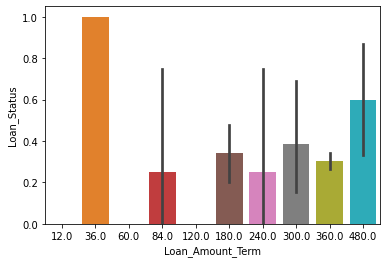

In [412]:
sns.barplot("Loan_Amount_Term", "Loan_Status", data=loan_data)

## Credit_history

In [413]:
loan_data['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


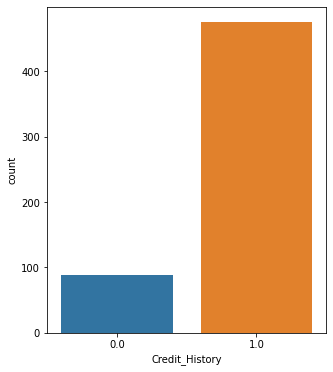

In [414]:
plt.figure(figsize=(5,6))
sns.countplot('Credit_History',data=loan_data)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


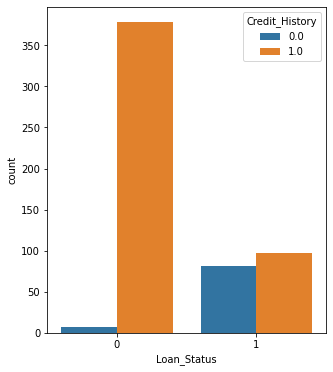

In [415]:
plt.figure(figsize=(5,6))
sns.countplot('Loan_Status',hue='Credit_History',data=loan_data)
plt.show()

In [416]:
loan_data['Credit_History'] = loan_data['Credit_History'].fillna(
                               loan_data['Credit_History'].dropna().mode().values[0] )

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


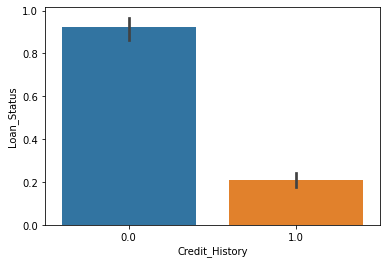

In [417]:
sns.barplot("Credit_History", "Loan_Status", data=loan_data)

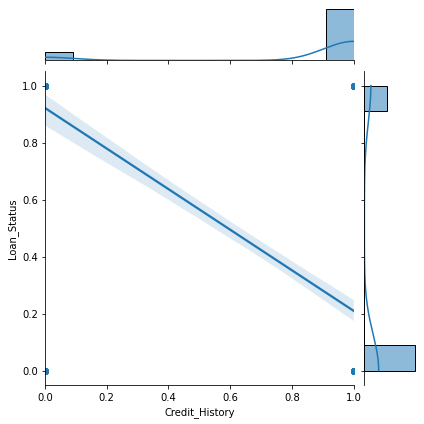

In [438]:
sns.jointplot(x='Credit_History',y='Loan_Status',data=loan_data, kind="reg")


## Property_Area


In [418]:
loan_data['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


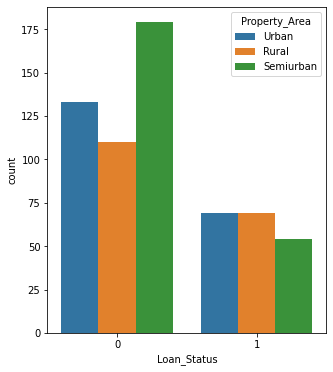

In [419]:
plt.figure(figsize=(5,6))
sns.countplot('Loan_Status',hue='Property_Area',data=loan_data)
plt.show()

In [420]:
level_encoding('Property_Area')

In [421]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 57.7 KB


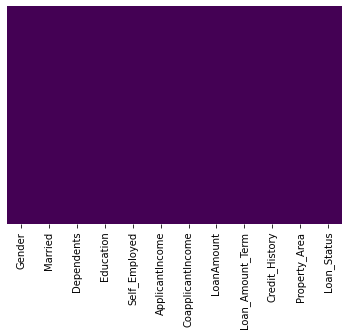

In [422]:
sns.heatmap(loan_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

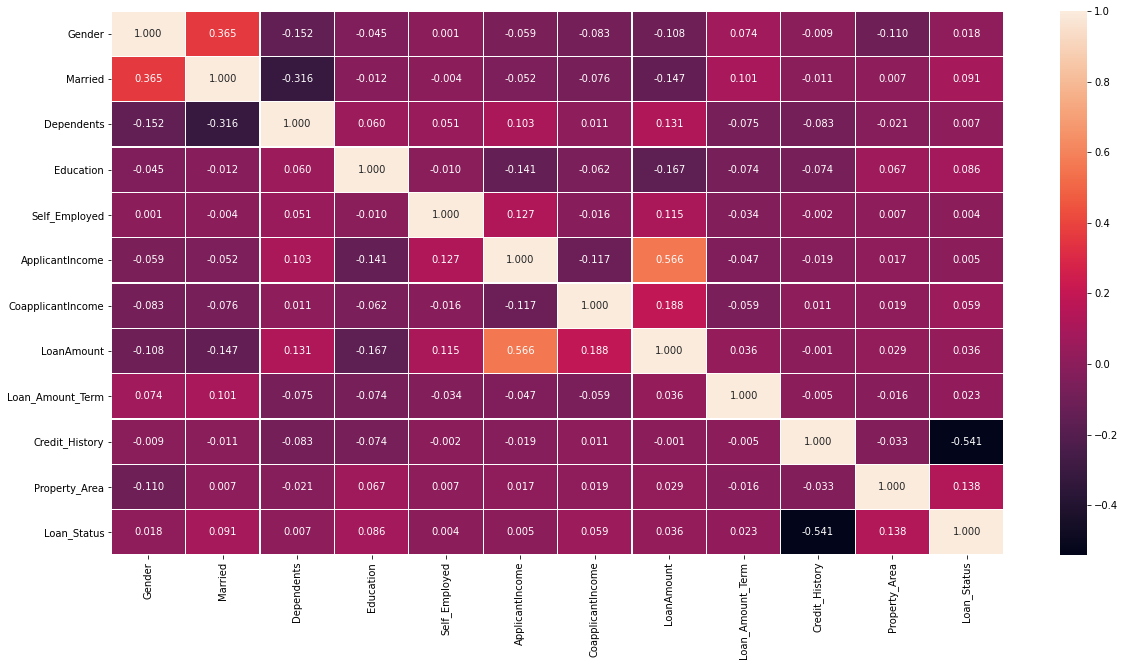

In [423]:
import matplotlib.pyplot as plt


plt.figure(figsize=(20,10))
sns.heatmap(loan_data.corr(), annot=True, linewidths=0.3, fmt= '.3f')

In [424]:
loan_data.corr()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,-0.151824,-0.045364,0.000525,-0.058809,-0.082912,-0.107930,0.074030,-0.009170,-0.109521,0.017987
Married,0.364569,1.000000,-0.315849,-0.012304,-0.004489,-0.051708,-0.075948,-0.147141,0.100912,-0.010938,0.007281,0.091478
Dependents,-0.151824,-0.315849,1.000000,0.060466,0.051121,0.103416,0.011146,0.130722,-0.075159,-0.082888,-0.020596,0.007318
Education,-0.045364,-0.012304,0.060466,1.000000,-0.010383,-0.140760,-0.062290,-0.166998,-0.073928,-0.073658,0.066740,0.085884
Self_Employed,0.000525,-0.004489,0.051121,-0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033739,-0.001550,0.007124,0.003700
ApplicantIncome,-0.058809,-0.051708,0.103416,-0.140760,0.127180,1.000000,-0.116605,0.565620,-0.046531,-0.018615,0.017321,0.004710
CoapplicantIncome,-0.082912,-0.075948,0.011146,-0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059383,0.011134,0.019087,0.059187
LoanAmount,-0.107930,-0.147141,0.130722,-0.166998,0.115260,0.565620,0.187828,1.000000,0.036475,-0.001431,0.029024,0.036416
Loan_Amount_Term,0.074030,0.100912,-0.075159,-0.073928,-0.033739,-0.046531,-0.059383,0.036475,1.000000,-0.004705,-0.016086,0.022549
Credit_History,-0.009170,-0.010938,-0.082888,-0.073658,-0.001550,-0.018615,0.011134,-0.001431,-0.004705,1.000000,-0.033102,-0.540556


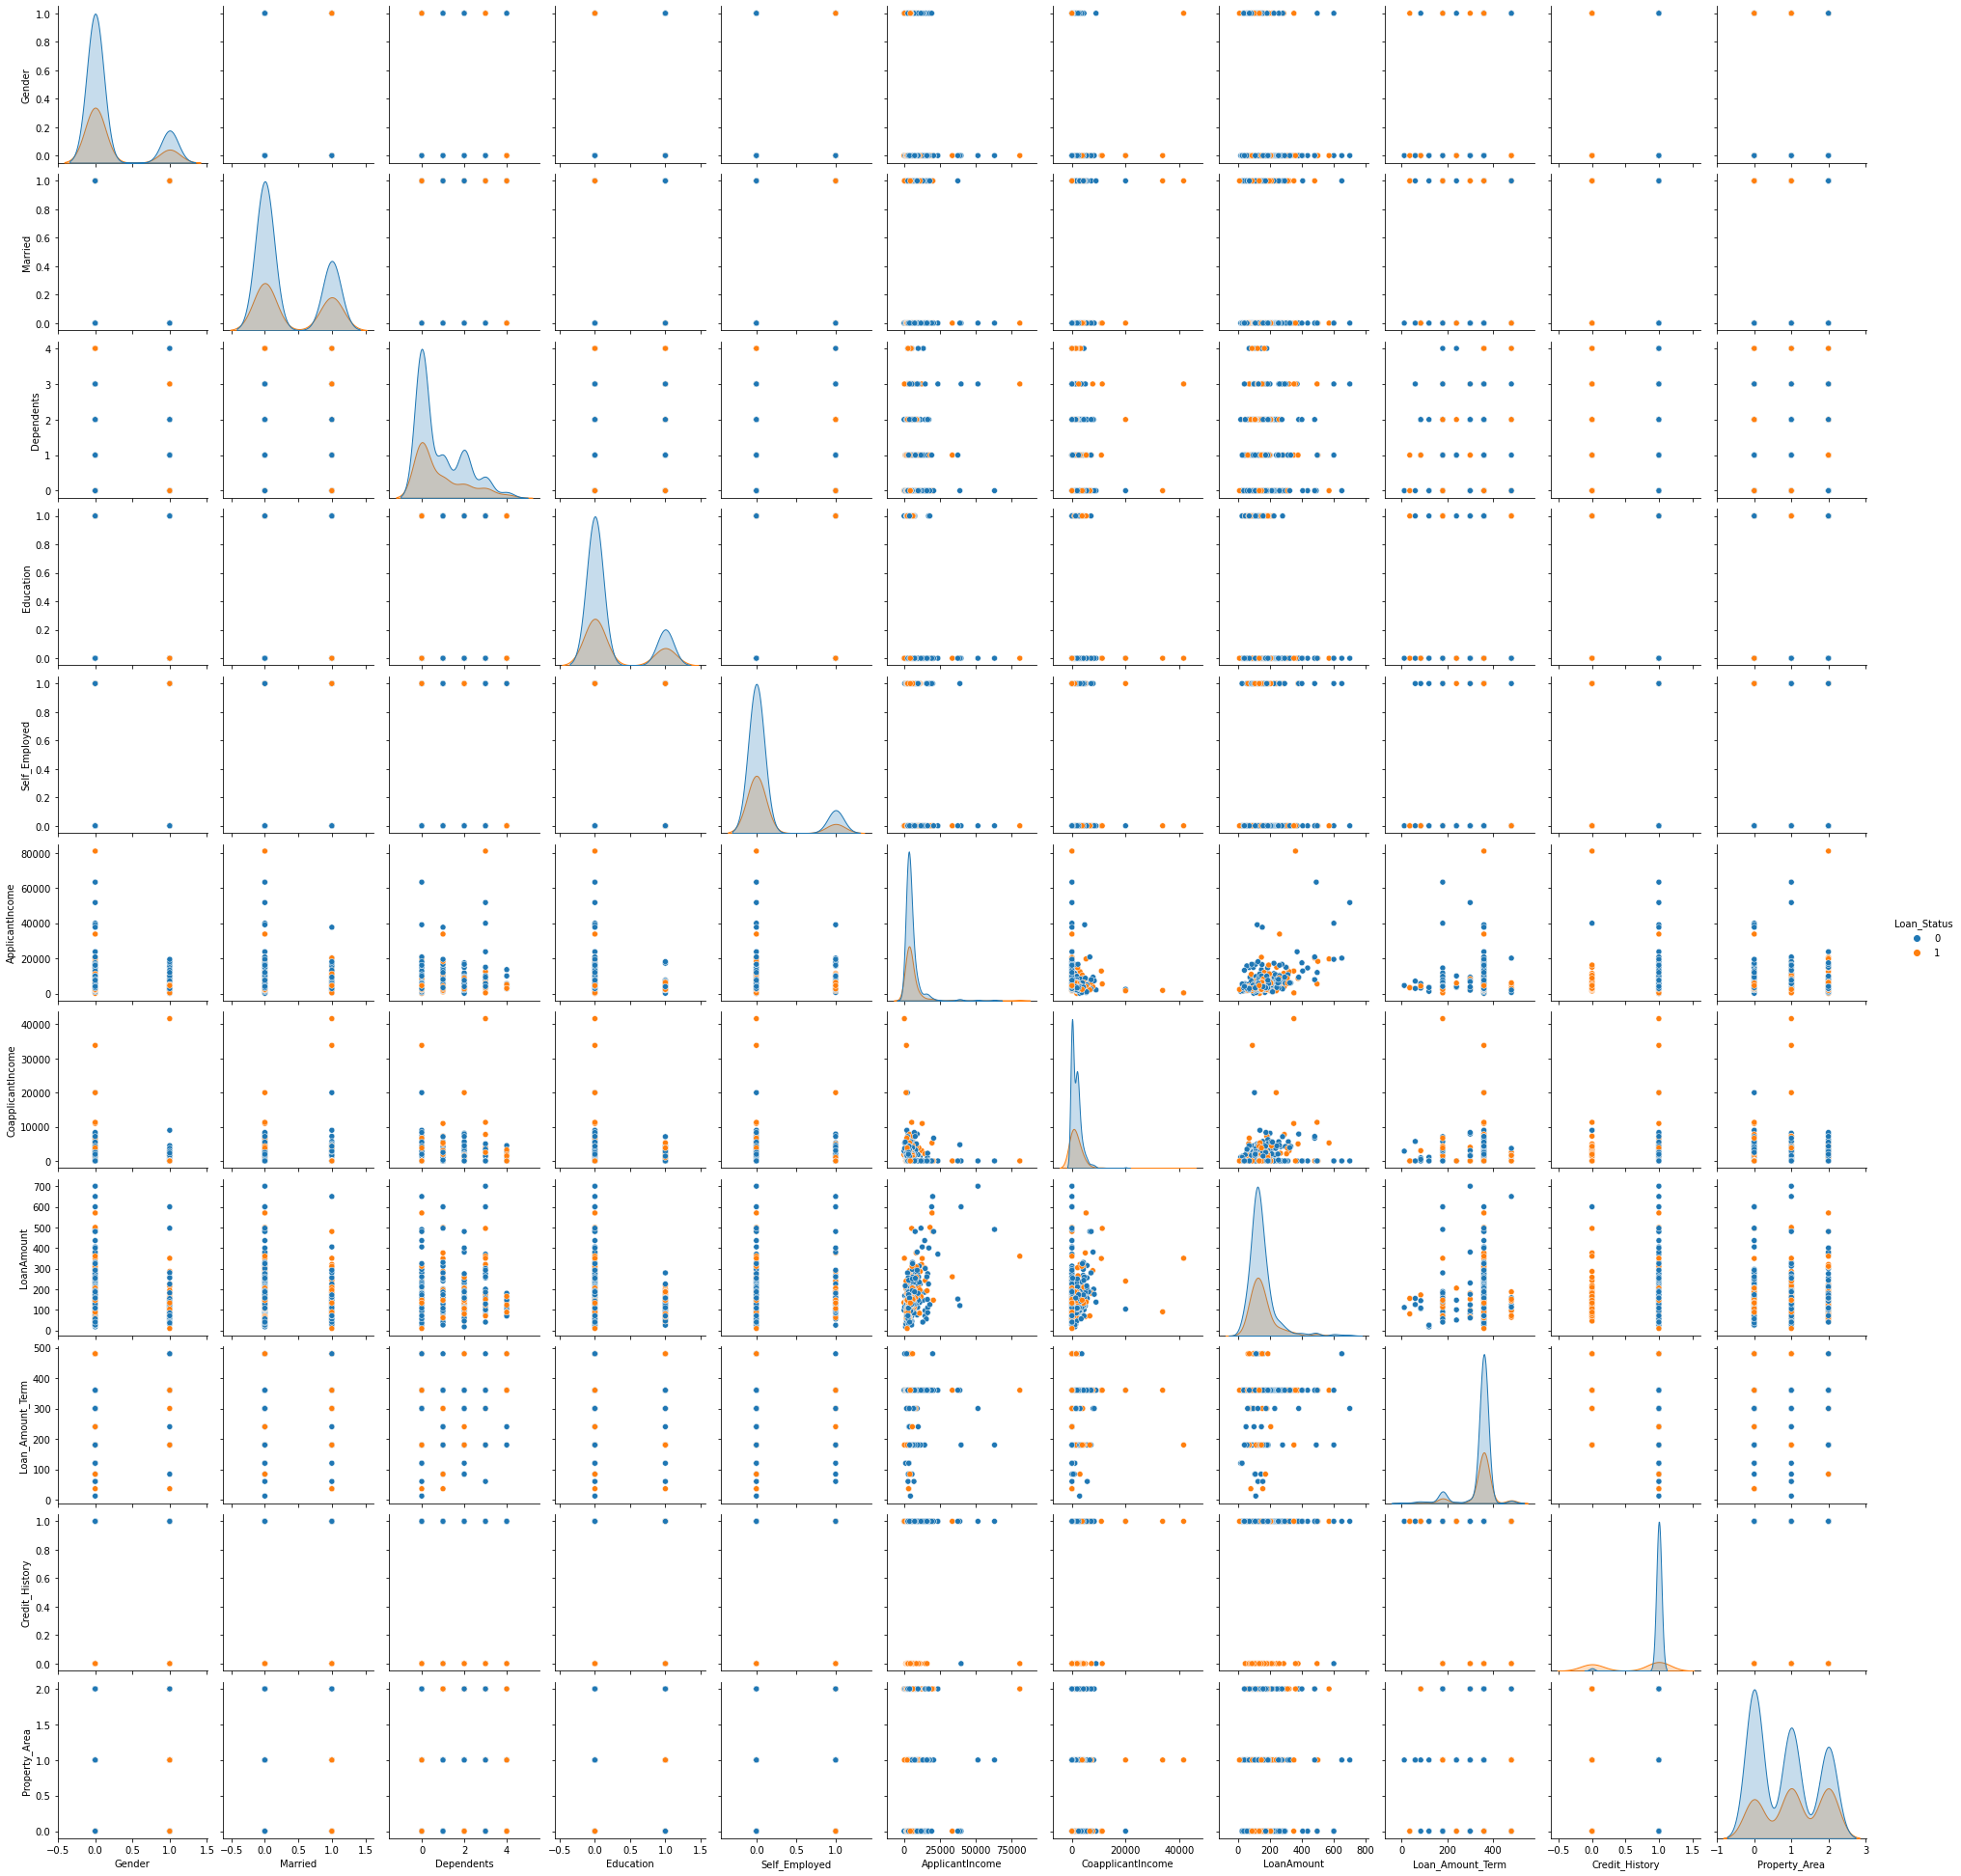

In [425]:
import seaborn as sns
sns.pairplot(loan_data,hue="Loan_Status")

In [426]:
print(loan_data.describe())

           Gender     Married  ...  Property_Area  Loan_Status
count  614.000000  614.000000  ...     614.000000   614.000000
mean     0.182410    0.346906  ...       0.912052     0.312704
std      0.386497    0.476373  ...       0.815081     0.463973
min      0.000000    0.000000  ...       0.000000     0.000000
25%      0.000000    0.000000  ...       0.000000     0.000000
50%      0.000000    0.000000  ...       1.000000     0.000000
75%      0.000000    1.000000  ...       2.000000     1.000000
max      1.000000    1.000000  ...       2.000000     1.000000

[8 rows x 12 columns]


# CREATE MODEL

The first task will be to **split the dataset** into train set and test set.

In [429]:
X_train = loan_data.drop("Loan_Status", axis=1)
Y_train = loan_data["Loan_Status"]

In [430]:
from sklearn.model_selection import train_test_split

# splitting data in training set(70%) and test set(30%).
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.3)

## Logistic Regression

In [431]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression() #create the object of the model
lr = lr.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [432]:
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score,recall_score,f1_score

act = accuracy_score(y_train,lr.predict(x_train))
print('Training Accuracy is: ',(act*100))
p = precision_score(y_train,lr.predict(x_train))
print('Training Precision is: ',(p*100))
r = recall_score(y_train,lr.predict(x_train))
print('Training Recall is: ',(r*100))
f = f1_score(y_train,lr.predict(x_train))
print('Training F1 Score is: ',(f*100))



Training Accuracy is:  81.11888111888112
Training Precision is:  91.93548387096774
Training Recall is:  42.857142857142854
Training F1 Score is:  58.46153846153847


In [433]:
act = accuracy_score(y_test,lr.predict(x_test))
print('Test Accuracy is: ',(act*100))
p = precision_score(y_test,lr.predict(x_test))
print('Test Precision is: ',(p*100))
r = recall_score(y_test,lr.predict(x_test))
print('Test Recall is: ',(r*100))
f = f1_score(y_test,lr.predict(x_test))
print('Test F1 Score is: ',(f*100))



Test Accuracy is:  81.62162162162161
Test Precision is:  90.32258064516128
Test Recall is:  47.45762711864407
Test F1 Score is:  62.22222222222222


In [435]:
y_pred = lr.predict(x_test)
np.set_printoptions(precision=2)
from itertools import chain
#y_pred = list(chain.from_iterable(y_pred))
#y_test=pd.to_numeric(y_test)
y_test=y_test.tolist()

In [436]:
for i in range(100):
    print("Actual : ", y_test[i], "; Predicted: ", y_pred[i])

Actual :  0 ; Predicted:  0
Actual :  1 ; Predicted:  0
Actual :  1 ; Predicted:  0
Actual :  0 ; Predicted:  0
Actual :  0 ; Predicted:  0
Actual :  0 ; Predicted:  0
Actual :  0 ; Predicted:  0
Actual :  1 ; Predicted:  1
Actual :  1 ; Predicted:  1
Actual :  0 ; Predicted:  0
Actual :  1 ; Predicted:  0
Actual :  0 ; Predicted:  0
Actual :  0 ; Predicted:  0
Actual :  0 ; Predicted:  0
Actual :  0 ; Predicted:  1
Actual :  1 ; Predicted:  0
Actual :  0 ; Predicted:  0
Actual :  0 ; Predicted:  0
Actual :  0 ; Predicted:  0
Actual :  0 ; Predicted:  0
Actual :  0 ; Predicted:  0
Actual :  0 ; Predicted:  0
Actual :  1 ; Predicted:  1
Actual :  0 ; Predicted:  0
Actual :  0 ; Predicted:  0
Actual :  0 ; Predicted:  0
Actual :  0 ; Predicted:  0
Actual :  1 ; Predicted:  0
Actual :  0 ; Predicted:  0
Actual :  0 ; Predicted:  0
Actual :  0 ; Predicted:  0
Actual :  1 ; Predicted:  0
Actual :  1 ; Predicted:  1
Actual :  1 ; Predicted:  0
Actual :  0 ; Predicted:  0
Actual :  0 ; Predic